## 이미지 읽기 - 부풀리기

- 565 ~ 571

- 572 ~ 581

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/test'

In [ ]:
# 너비
IM_WIDTH = 220

# 높이
IM_HEIGHT = 220

In [ ]:
# 이미지 읽을 객체
datagen = ImageDataGenerator()

# flow_from_directory : 디렉토리에서 이미지 읽을 객체 생성
# class_mode = 'categorical' : 다중 분류
# batch_size = 10 :  한번에 리턴할 이미지 개수 30개
train_generator = datagen.flow_from_directory(train_path,
                            target_size = (IM_WIDTH, IM_HEIGHT),
                            batch_size = 30,
                            class_mode = 'categorical',
                            shuffle =False
                            )

# 전체 이미지 개수 호가인
print(train_generator.n)

# 배치사이즈 확인
print(train_generator.batch_size)

Found 150 images belonging to 3 classes.
150
30


In [ ]:
img, label = train_generator.next()

# 각 줄의 최댓값 인덱스 리턴 (정답)
label_num = np.argmax(label, 1)

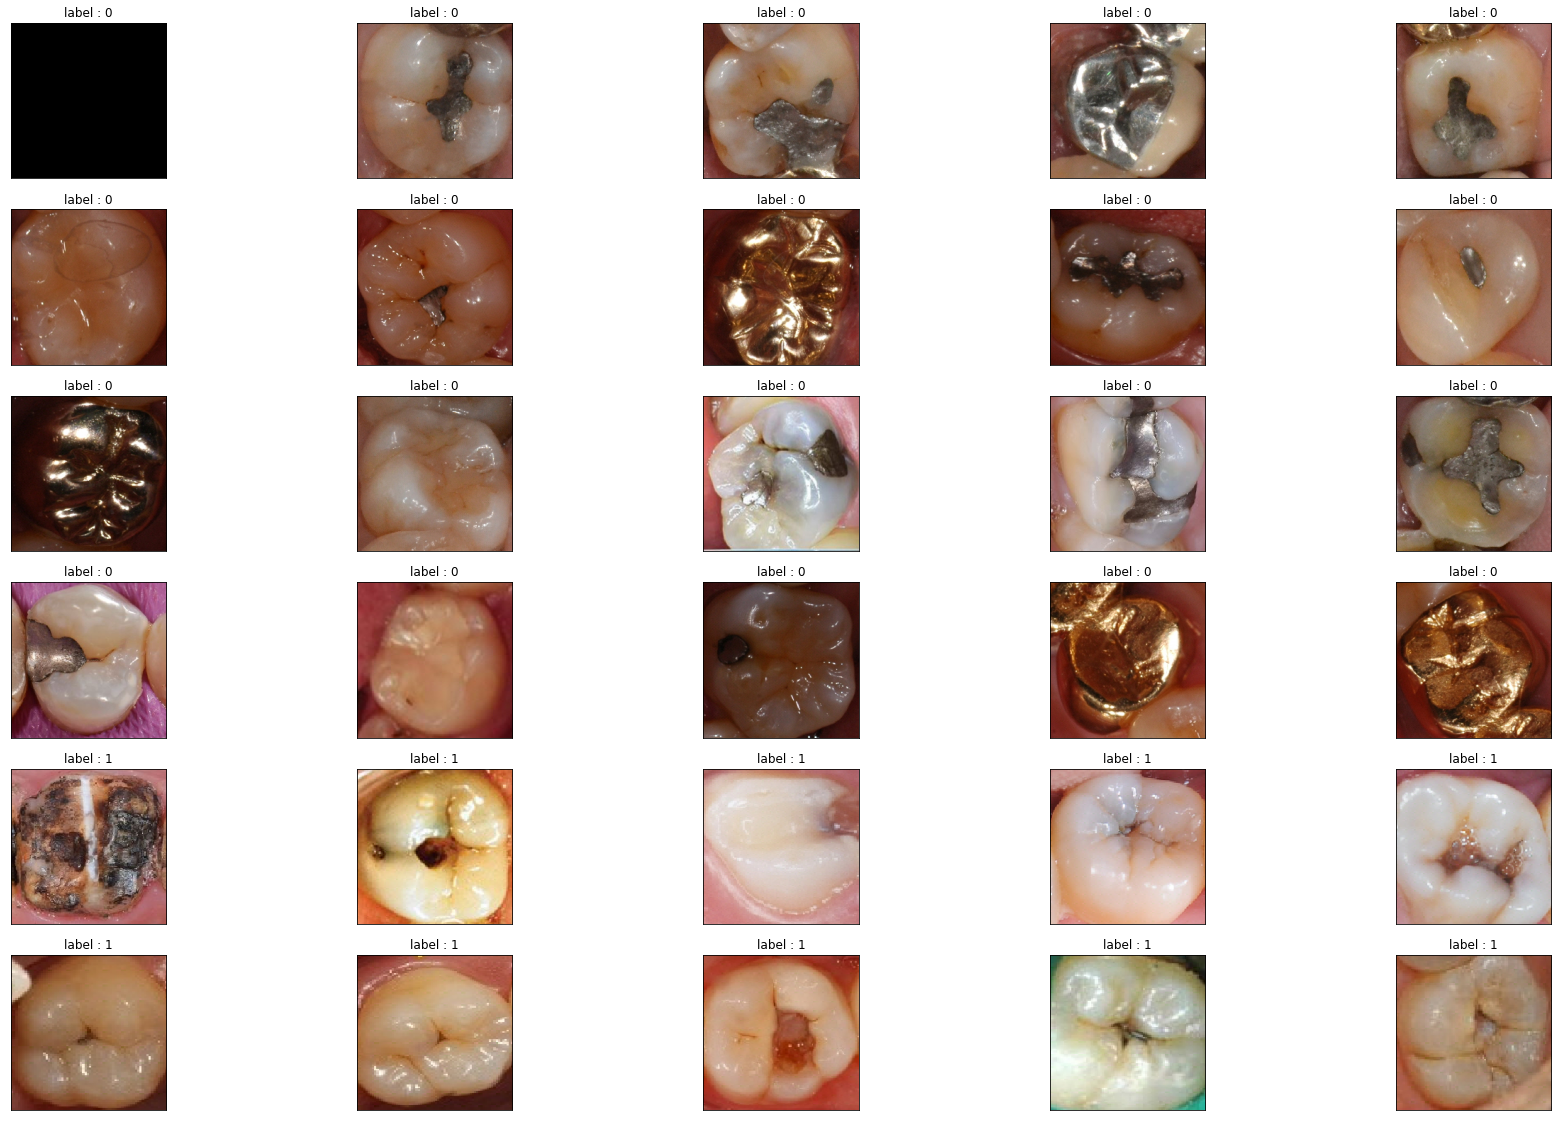

In [ ]:
fig = plt.figure(figsize = (30, 20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.set_title('label : %d' % label_num[i])
  img[i] = img[i]/255.0
  subplot.imshow(img[i].reshape((IM_WIDTH, IM_HEIGHT,3)))

plt.show()

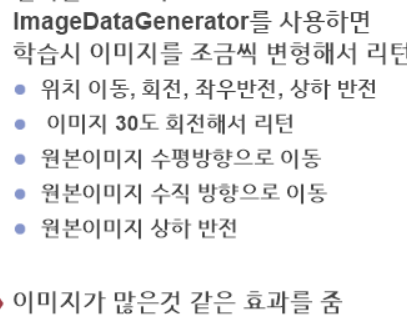

In [ ]:
# 이미지 증강
datagen = ImageDataGenerator(
                rotation_range = 180, # 최대 180도 회전
                width_shift_range = 0.2, # 좌우 이동 최대 20%
                height_shift_range = 0.2, # 상하 이동 최대 20%
                horizontal_flip = True, # 좌우반전
                vertical_flip = True # 상하 반전
            )

In [ ]:
train_generator = datagen.flow_from_directory(
                        train_path,
                        target_size = (IM_HEIGHT, IM_WIDTH),
                        batch_size = 1,
                        class_mode = 'categorical',
                        shuffle = False
)

Found 150 images belonging to 3 classes.


In [ ]:
img, label = train_generator.next()

# 각 줄의 최댓값 인덱스 리턴 (정답)
label_num = np.argmax(label, 1)

# 255로 나눠서 0~ 1사이 값으로 변환
img = img/ 255.0


In [ ]:
index = 0

# 증강 데이터 저장할 리스트
all_generate_img = []

for i in datagen.flow(img):
  all_generate_img.append(i)

  index +=1
  if index > 20:
    break

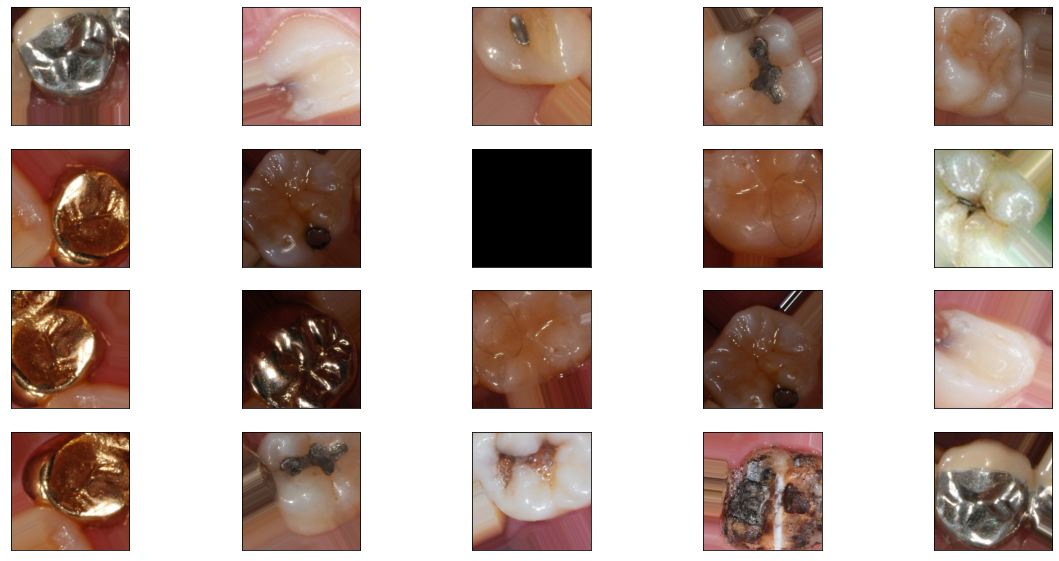

In [ ]:
fig = plt.figure(figsize = (20, 10))
for i in range(20):
  subplot = fig.add_subplot(4, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.imshow(all_generate_img[i][0])
plt.show()